In [1]:
addprocs(5)

5-element Array{Int64,1}:
 2
 3
 4
 5
 6

In [39]:
using JuMIT
using PyPlot
pygui(false)
reload("JuMIT")

INFO: Recompiling stale cache file /math/home/pawbz/.julia/lib/v0.6/JuMIT.ji for module JuMIT.


	Seismic Model:	acou_homo2
	> number of samples:	x	51	z	51
	> vp bounds:	min	1700.0	max	2300.0
	> ρ bounds:	min	1700.0	max	2300.0
	Seismic Model:	

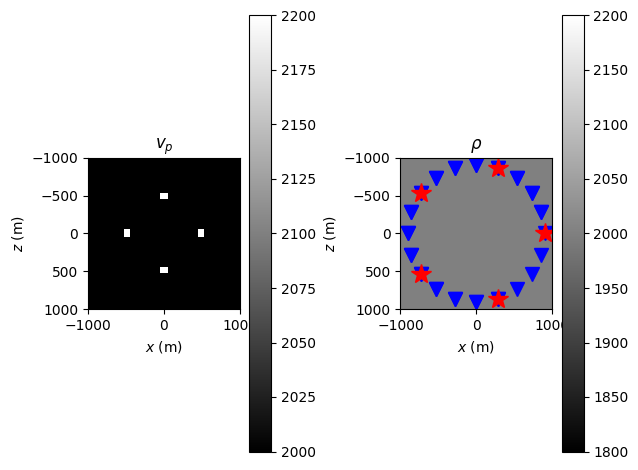

acou_homo2
	> number of samples:	x	51	z	51
	> vp bounds:	min	1700.0	max	2300.0
	> ρ bounds:	min	1700.0	max	2300.0


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2b3d68b56ef0>

In [40]:
model = JuMIT.Gallery.Seismic(:acou_homo2);
#model = JuMIT.Models.Seismic_addon(model, circ_rad=10., circ_loc=[-000.,0.],circ_pert=0.2)
JuMIT.Models.Seismic_addon!(model, circ_rad=50., circ_loc=[500.,0.],circ_pert=0.1,randn_perc=0.0, fields=[:χvp])
JuMIT.Models.Seismic_addon!(model, circ_rad=50., circ_loc=[0.,500.],circ_pert=0.1,randn_perc=0.0, fields=[:χvp])
JuMIT.Models.Seismic_addon!(model, circ_rad=50., circ_loc=[-500.,0.],circ_pert=0.1,randn_perc=0.0, fields=[:χvp])
JuMIT.Models.Seismic_addon!(model, circ_rad=50., circ_loc=[0.,-500.],circ_pert=0.1,randn_perc=0.0, fields=[:χvp])
#model = JuMIT.Models.Seismic_addon(model, circ_pert=0.2, rect_loc=[-200.,-500.,200.,500.] )
model0 = JuMIT.Gallery.Seismic(:acou_homo2);
acqgeom = JuMIT.Acquisition.Geom_circ(nss=5,nr=20,rad=[900.,900.])#,θlim=[90.,180.]);

#tgrid = JuMIT.Grid.M1D_resamp(tgrid, tgrid.δx/2.0)
JuMIT.Plots.Seismic(model)
JuMIT.Plots.Geom(acqgeom)

	Source Acquisition:	
	> number of supersources:	5
	> sources per supersource:	min	1	max	1
	> frequency:	min	

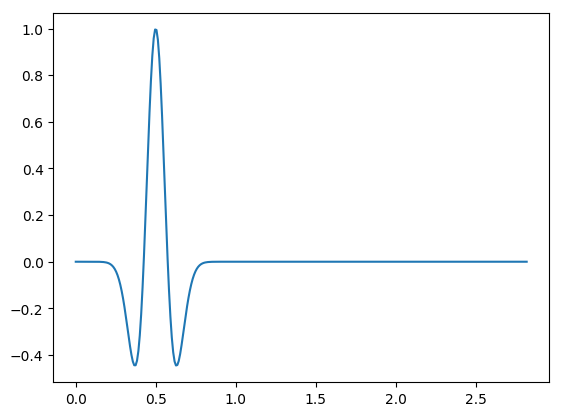

0.224609375	max	9.43359375	peak	2.919921875
	> time:	min	0.0	max	2.8173913043478263
	> samples:	325


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2b3d688e9438>

In [41]:
acqsrc=JuMIT.Acquisition.Src_fixed_mod(acqgeom.nss,1,1,model,3)
tgrid=acqsrc.tgrid
JuMIT.Plots.Src(acqsrc)


In [42]:
@time pa = JuMIT.Inversion.Param(acqsrc,mprecon_flag=false, 
    acqgeom, tgrid,:fdtd,:migr,model0,modm_obs=model, igrid=JuMIT.Grid.M2D_resamp(model.mgrid,50.,50.,), 
    verbose=true);

updating buffer
updating buffer
  9.157130 seconds (2.37 M allocations: 155.470 MiB, 0.96% gc time)


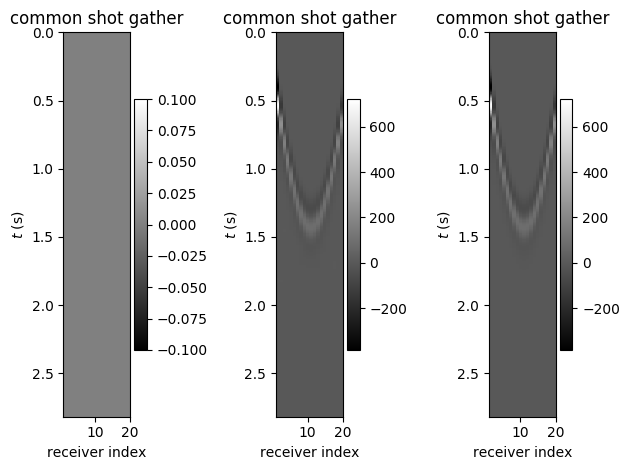

In [43]:
JuMIT.Plots.TD([pa.wdcal, pa.dobs, pa.dcal], attrib=:seis, )
#JuMIT.Models.Seismic_iszero(JuMIT.Models.Seismic_zeros(pa.modm.mgrid))
#imshow(pa.dobs.d[1,1]-pa.dcal.d[1,1])

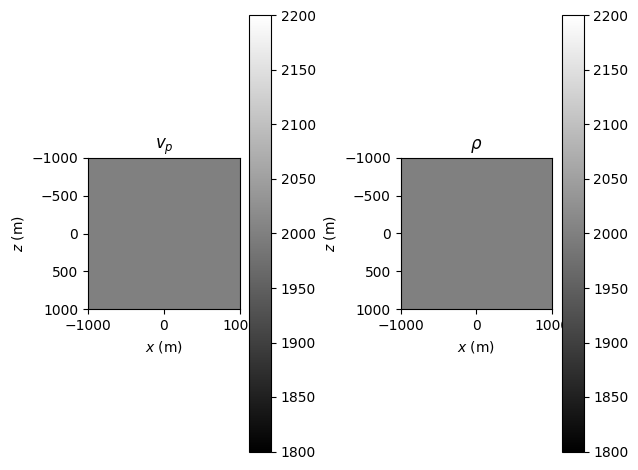

In [44]:
JuMIT.Plots.Seismic(pa.modm)

In [45]:
@time migr2 = JuMIT.Inversion.xfwi!(pa)

xfwi: number of inversion variables:	3362
computing gradient...
updating buffer
computing gradient...
minimum and maximum velocities:	1700.0	2300.0
time sampling	0.008695652173913044	can be as high as:	0.008695652173913044
number of receivers:	36
number of sources:	36
number of super sources:	5
	From worker 6:	modelling supershot:	5
	From worker 4:	modelling supershot:	3
	From worker 5:	modelling supershot:	4
	From worker 3:	modelling supershot:	2
	From worker 2:	modelling supershot:	1
maximum value of g(x):	9325.569899953613
  3.016841 seconds (2.04 M allocations: 191.983 MiB, 2.76% gc time)


JuMIT.Models.Seismic([1700.0, 2300.0], [0.0, 0.0], [1700.0, 2300.0], [-12.9159 39.5557 … -81.2313 156.176; -300.493 -193.249 … 77.8972 246.26; … ; -300.512 -193.243 … 77.9057 246.275; -12.9975 39.5186 … -81.2103 156.206], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-36.2347 18.6054 … 13.4212 147.647; -227.11 -145.472 … 135.058 275.324; … ; -193.521 -142.235 … 128.616 239.304; 15.5487 70.1052 … -30.5839 110.252], JuMIT.Grid.M2D([-1000.0, -950.0, -900.0, -850.0, -800.0, -750.0, -700.0, -650.0, -600.0, -550.0  …  550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0], [-1000.0, -950.0, -900.0, -850.0, -800.0, -750.0, -700.0, -650.0, -600.0, -550.0  …  550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0], 41, 41, 50, 50.0, 50.0))

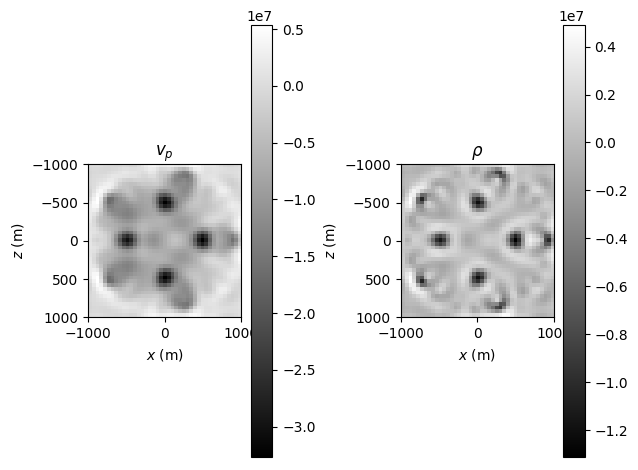

In [46]:
JuMIT.Plots.Seismic(migr2)# xlim=[-500., 500.], zlim=[-500., 500.])
#println(maximum(migr2.χvp))
#println(maximum(migr2.χρ))
#pygui(false)

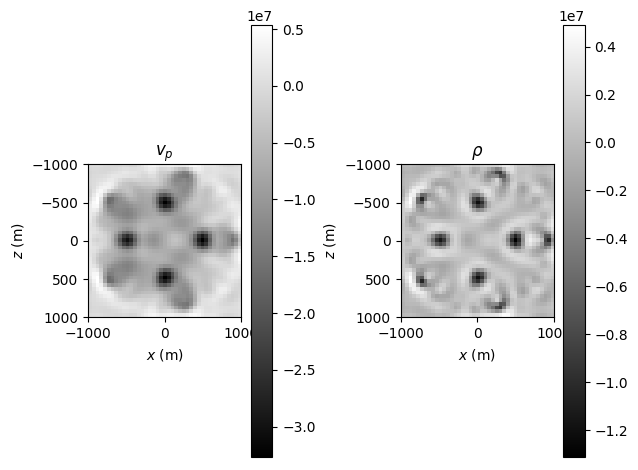

In [47]:
JuMIT.Plots.Seismic(migr2)# xlim=[-500., 500.], zlim=[-500., 500.])

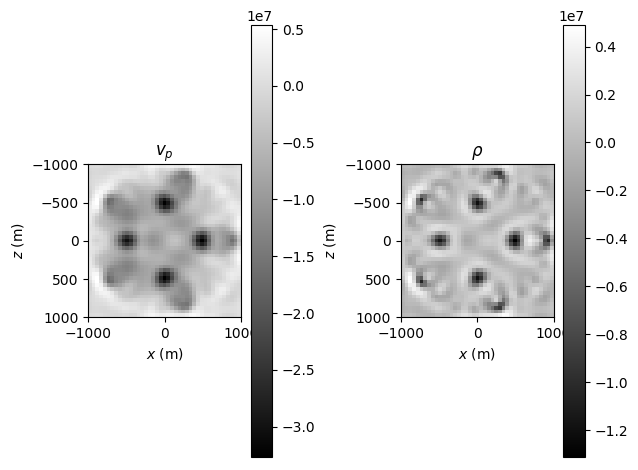

2673.281479603924
2446.0770937359102


In [8]:
JuMIT.Plots.Seismic(migr2)# xlim=[-500., 500.], zlim=[-500., 500.])
println(maximum(migr2.χvp))
println(maximum(migr2.χρ))
#pygui(false)

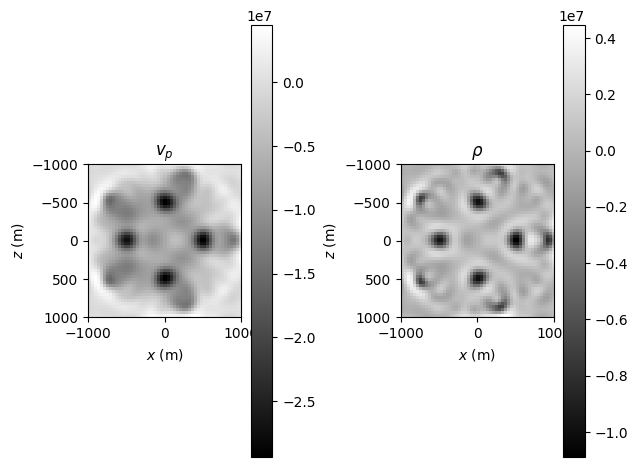

In [54]:
#imshow(reshape(diag(pa.mprecon),pa.modi.mgrid.nz,pa.modi.mgrid.nx,2)[:,:,1]); colorbar()
#println(minimum(diag(pa.mprecon)))
#pygui(false)
#imshow(pa.mprecon)
JuMIT.Plots.Seismic(pa.gmodm)

In [53]:
@time pac = JuMIT.Inversion.Param(acqsrc,mprecon_flag=true, 
    acqgeom, tgrid,:fdtd,:cls,model0,modm_obs=model, igrid=JuMIT.Grid.M2D_resamp(model.mgrid,50.,50.,));

  0.481694 seconds (297.89 k allocations: 62.855 MiB, 4.30% gc time)


In [50]:
@time rcls = JuMIT.Inversion.xfwi!(pac, extended_trace=false)

Iter     Function value   Gradient norm 
     0     1.201677e+03     9.197298e+02
     1     1.054361e+03     1.156358e+03
     2     8.788079e+02     8.080832e+02
Iter     Function value   Gradient norm 
     0     7.670211e+02     8.081117e+02
     1     6.463587e+02     8.263821e+02
     2     5.897383e+02     5.099059e+02
Iter     Function value   Gradient norm 
     0     5.896265e+02     5.099059e+02
     1     5.466444e+02     6.772953e+02
     2     4.730265e+02     5.374214e+02
Iter     Function value   Gradient norm 
     0     4.730264e+02     5.374214e+02
     1     4.148367e+02     5.290711e+02
     2     3.908696e+02     3.282498e+02
Iter     Function value   Gradient norm 
     0     3.908696e+02     3.282498e+02
     1     3.706790e+02     4.559311e+02
 37.487430 seconds (31.63 M allocations: 5.917 GiB, 5.73% gc time)


Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [-0.17256944740858587,-0.15839538067808814, ...]
 * Minimizer: [-0.1719583673323015,-0.15988692299050422, ...]
 * Minimum: 3.706790e+02
 * Iterations: 5
 * Convergence: false
   * |x - x'| < 1.0e-03: false 
     |x - x'| = 1.04e-02 
   * |f(x) - f(x')| / |f(x)| < 1.0e-03: false
     |f(x) - f(x')| / |f(x)| = 5.45e-02 
   * |g(x)| < 1.0e-03: false 
     |g(x)| = 4.56e+02 
   * stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 51
 * Gradient Calls: 51

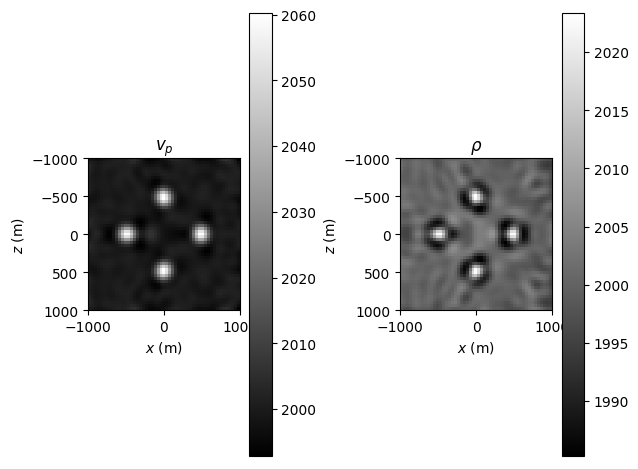

In [51]:
JuMIT.Plots.Seismic(pac.modm)

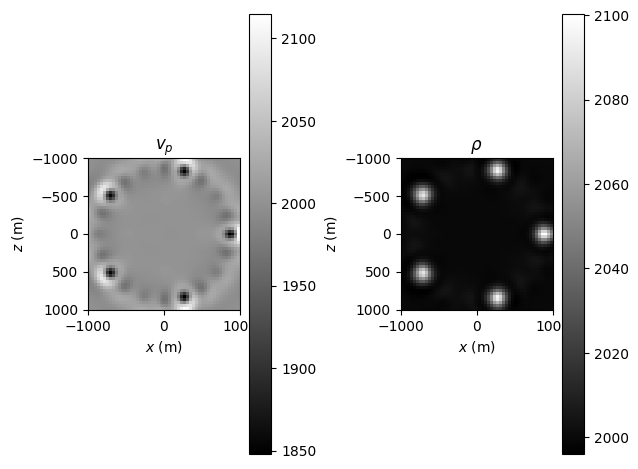

In [9]:
JuMIT.Plots.Seismic(rcls[1][2])

In [15]:
@time rcls = JuMIT.Inversion.xfwi!(pac)

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     2.391396e+03     2.378900e+03
 * Current step size: 1.0
 * g(x): [-18.8742,67.1032,103.971,94.9333,91.5999,74.5665,60.1375,33.0666,-17.0591,-86.8978,-136.143,-114.997,-24.056,37.7296,36.6934,64.573,162.146,154.289,107.306,91.5697,132.352,91.612,107.3,154.216,162.093,64.6439,36.8644,37.9794,-23.7414,-114.861,-136.174,-86.8886,-16.4961,34.1231,61.245,75.0617,90.9008,93.7651,103.291,67.5617,-17.5608,-30.929,64.1493,81.2218,51.697,28.4429,-6.91883,-72.0852,-144.54,-227.18,-215.939,-187.569,-72.7794,139.684,233.894,241.785,255.555,318.625,231.932,218.999,336.015,588.639,336.056,218.944,231.811,318.75,256.089,242.556,234.695,140.473,-72.4067,-187.585,-216.198,-227.196,-143.882,-70.9865,-6.03967,28.1521,50.2981,79.7841,63.7097,-29.9447,-43.3427,40.2103,43.5494,4.27858,-42.0767,-102.178,-202.219,-273.591,-304.078,-199.842,-126.738,1.10295,218.922,297.541,309.778,332.807,369.422,223.83,221.262,393.4,728.736,393.4,221.165,223.722,369.719,333.59

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     2.046794e+03     1.655628e+03
 * Current step size: 4.2453509640441385e-6
 * g(x): [-16.9608,47.5526,58.6105,14.2419,-51.7802,-62.9294,-34.1368,30.5508,113.394,94.9577,56.2479,58.6971,129.964,115.013,68.9035,76.1683,176.855,151.795,44.4811,-68.9947,-130.408,-68.9951,44.4425,151.75,176.927,76.3543,69.1253,115.259,130.31,58.94,56.3666,95.1307,114.179,31.842,-32.787,-62.2564,-52.449,12.9602,57.804,47.9881,-15.5306,-50.785,4.27981,-4.66801,-62.9911,-116.121,-71.8273,-1.30643,93.4618,193.59,145.628,95.8302,102.146,163.809,76.0019,-40.7544,-41.7426,73.6987,64.7526,-39.3655,-110.915,-101.289,-110.904,-39.4213,64.718,74.06,-40.9793,-39.8512,76.8122,164.573,102.56,95.9,145.456,193.69,94.3009,0.069599,-70.6388,-116.186,-64.4151,-6.26345,3.70003,-49.7676,-85.7318,-36.4201,-37.6847,-73.5183,-80.2493,-5.59825,76.7716,159.35,220.438,125.687,65.9254,74.8756,103.513,-34.1394,-204.067,-200.899,-88.4589,-68.3392,-128.095,-118.34,-16.1345,-118.345,-128.169,-68.346,-87.9177,-199.849,-202.915,-3

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     8.673696e+02     5.623391e+02
 * Current step size: 1.491995392767342e-5
 * g(x): [-10.4036,2.96566,-10.0344,-44.4005,-81.394,-61.014,-17.0552,53.2424,129.258,91.8628,29.6402,-17.7973,-56.3324,-104.033,-163.434,-170.277,-150.653,-142.26,-232.965,-342.21,-462.467,-342.556,-233.331,-142.252,-149.826,-169.225,-162.612,-103.5,-55.6878,-17.2323,29.9333,92.0123,130.122,54.9542,-15.1428,-60.0422,-82.4258,-46.3002,-10.9981,4.27403,-7.51527,-40.9079,-56.7024,-75.2806,-93.2003,-73.8695,14.8132,106.913,191.127,243.99,121.265,6.58441,-82.7264,-206.183,-320.728,-434.519,-415.219,-313.466,-189.25,-254.867,-386.36,-537.088,-386.478,-255.045,-189.132,-312.283,-413.546,-433.186,-320.161,-206.076,-82.843,6.05662,120.303,243.185,191.578,108.272,16.032,-74.438,-95.5918,-77.6637,-57.0112,-38.4702,-79.8744,-87.3184,-67.7873,-35.9418,46.5607,133.68,203.443,231.642,196.783,38.6694,-55.0787,-105.98,-227.697,-383.176,-541.425,-526.461,-387.829,-179.199,-173.222,-250.441,-353.058,-250.391,-173.275,-17

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     6.944026e+02     5.623579e+02
 * Current step size: 1.0
 * g(x): [-10.3712,3.00241,-10.0022,-44.3698,-81.3649,-60.9859,-17.0279,53.2691,129.284,91.8886,29.6656,-17.7718,-56.3062,-104.006,-163.407,-170.249,-150.624,-142.23,-232.936,-342.181,-462.439,-342.527,-233.302,-142.222,-149.797,-169.197,-162.585,-103.473,-55.6616,-17.2069,29.9587,92.0381,130.149,54.9809,-15.1156,-60.0142,-82.3966,-46.2695,-10.966,4.31079,-7.48295,-40.8719,-56.661,-75.2453,-93.1672,-73.8385,14.843,106.941,191.155,244.017,121.291,6.61021,-82.7001,-206.155,-320.699,-434.489,-415.188,-313.434,-189.218,-254.835,-386.328,-537.055,-386.446,-255.014,-189.1,-312.251,-413.515,-433.156,-320.132,-206.048,-82.8167,6.08242,120.329,243.212,191.606,108.301,16.0618,-74.407,-95.5587,-77.6284,-56.9698,-38.4341,-79.8429,-87.283,-67.7567,-35.9129,46.5879,133.706,203.468,231.666,196.806,38.6916,-55.0566,-105.957,-227.673,-383.151,-541.399,-526.434,-387.801,-179.171,-173.195,-250.413,

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     5.575099e+02     4.919857e+02
 * Current step size: 3.194104328056271e-6
 * g(x): [-5.18566,13.2363,10.2945,1.17263,10.3882,18.0815,9.2546,-4.72461,-26.9891,-55.8025,-83.6985,-85.0531,-74.8669,-65.4323,-83.2356,-75.6117,-52.2368,-50.2076,-90.1877,-123.189,-153.942,-123.665,-90.7531,-50.3507,-51.5103,-74.7424,-82.8059,-65.4558,-74.8406,-84.7958,-83.4742,-55.5528,-25.9711,-3.04086,10.8933,18.6073,8.92346,-0.802336,9.50621,14.8197,-2.17838,-16.3522,-23.53,-36.4913,-34.9599,4.63293,32.5531,21.5315,1.51127,-15.7179,-32.5526,-48.3862,-47.1027,-50.004,-75.296,-112.822,-99.1799,-44.7803,-6.50302,-14.4013,-26.0294,-22.3651,-25.7691,-14.3882,-6.65303,-44.4829,-98.4845,-112.382,-75.4258,-50.337,-47.1757,-48.5173,-32.8486,-15.5672,2.66047,23.1977,33.6087,3.59323,-37.5609,-38.743,-23.4766,-13.6852,-45.1522,-54.9818,-43.3798,-9.34154,57.4578,66.3748,31.9755,-1.0731,-8.01823,-0.101092,7.58032,19.3938,10.4916,-52.4082,-105.514,-94.9931,-30.8886,34.1372,71.9229,99.6079,140.808,100.37,72.2939

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     4.545051e+02     6.230704e+02
 * Current step size: 6.926790803311763e-6
 * g(x): [5.71214,38.9013,48.9817,62.8087,107.893,92.3466,36.3021,-40.192,-120.114,-129.662,-122.999,-88.104,-36.7452,3.4285,7.71979,11.2661,25.987,30.8356,50.8289,93.1788,144.604,92.8121,50.3443,30.6605,26.5153,11.8943,7.91968,3.25322,-36.7166,-87.6661,-122.471,-129.081,-118.909,-38.6896,37.539,92.6263,106.978,62.1078,49.6948,41.6831,8.93539,27.5564,42.606,30.9247,39.029,75.0762,31.3442,-71.09,-171.303,-239.718,-170.589,-114.195,-43.2742,56.8845,118.795,144.002,141.717,136.002,105.938,146.285,219.879,316.542,220.387,146.437,105.532,135.628,141.984,144.379,118.836,56.6988,-43.4077,-114.494,-171.076,-239.894,-170.785,-70.4722,31.2768,73.6549,37.4781,30.6348,44.8804,31.2801,17.4063,11.8868,0.769425,13.3356,30.151,-44.0803,-168.679,-246.652,-241.392,-105.31,-33.0503,23.7085,110.469,162.687,208.892,220.221,207.068,146.534,187.45,260.846,347.689,261.751,187.808,145.832,206.056,220.36,209.547,162.882,109.868,

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     4.543321e+02     6.230704e+02
 * Current step size: 1.0
 * g(x): [5.71217,38.9013,48.9817,62.8088,107.893,92.3466,36.3022,-40.192,-120.114,-129.662,-122.999,-88.104,-36.7452,3.42852,7.71982,11.2661,25.987,30.8357,50.829,93.1789,144.604,92.8121,50.3444,30.6605,26.5153,11.8943,7.91971,3.25325,-36.7165,-87.666,-122.471,-129.081,-118.909,-38.6896,37.539,92.6264,106.979,62.1078,49.6949,41.6831,8.93542,27.5564,42.6061,30.9247,39.029,75.0763,31.3443,-71.09,-171.303,-239.718,-170.589,-114.195,-43.2742,56.8845,118.795,144.002,141.717,136.002,105.938,146.285,219.879,316.542,220.387,146.437,105.532,135.628,141.984,144.379,118.836,56.6988,-43.4077,-114.494,-171.076,-239.894,-170.785,-70.4721,31.2768,73.6549,37.4782,30.6349,44.8805,31.2801,17.4063,11.8869,0.769456,13.3356,30.151,-44.0803,-168.679,-246.652,-241.392,-105.31,-33.0502,23.7085,110.469,162.687,208.892,220.221,207.068,146.534,187.45,260.846,347.69,261.751,187.808,145.832,206.056,220.36,2

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     4.038677e+02     4.374134e+02
 * Current step size: 1.9471315429398722e-6
 * g(x): [4.69955,32.4424,32.7422,28.4288,40.626,28.37,-2.43275,-30.2322,-43.2784,-34.6214,-29.2123,-8.29191,30.1391,33.6109,16.3313,12.1915,33.3276,33.2818,24.3894,19.7354,23.6403,19.3348,23.9061,33.1771,33.9932,12.9044,16.5419,33.3883,30.1066,-7.86468,-28.6553,-34.0022,-42.0907,-28.8355,-1.34548,28.5287,39.6584,27.6913,33.3303,34.9701,7.67974,16.8497,21.1677,-0.832763,-9.92505,6.91363,1.26749,-33.0507,-52.1925,-37.4039,-4.37581,9.82973,29.3027,62.1176,43.0288,10.4713,1.64068,20.7719,25.8228,22.0657,9.88537,-1.73645,10.306,22.1945,25.543,20.6787,2.11792,10.9724,43.1662,62.13,29.4673,9.92795,-4.43277,-37.1676,-51.4588,-32.3217,1.27201,5.59486,-11.423,-1.21358,23.1255,20.1981,-1.40768,-14.7759,-29.0204,-21.623,6.24703,-3.86821,-40.687,-47.6706,-7.54526,30.1592,38.6254,44.8002,53.712,13.1987,-24.4322,-23.5066,-5.27623,4.01697,13.4141,12.5243,-4.54286,13.347,13.7594,3.45169,-6.02001,-23.1755,-23.6127,13.6

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     3.437449e+02     4.799265e+02
 * Current step size: 9.731638069828518e-6
 * g(x): [-3.78254,17.9066,11.6803,-9.64586,-27.8846,-23.4918,-9.35487,24.8447,77.6495,70.8891,42.0345,13.049,-12.104,-45.2882,-77.8942,-77.5114,-52.7788,-35.907,-64.9641,-107.515,-153.777,-108.065,-65.4779,-35.7815,-51.6069,-76.4112,-77.4803,-45.4705,-12.1776,13.4188,42.4868,71.2843,78.2731,25.4744,-9.06121,-23.8149,-28.8356,-10.2727,11.9507,19.4836,-1.81768,-0.621677,0.458646,-23.1092,-44.6776,-36.7232,8.73518,54.1557,105.436,160.793,109.605,48.2964,-8.60237,-77.37,-145.616,-209.588,-207.654,-165.798,-101.765,-132.336,-213.946,-323.867,-213.938,-132.42,-101.703,-164.915,-206.328,-208.473,-144.981,-76.6414,-7.60578,49.3497,110.453,161.665,106.18,54.5718,8.49406,-37.8279,-45.8285,-23.6263,1.34874,1.28458,-20.3571,-27.0569,-35.7246,-31.7809,11.278,63.124,101.133,126.805,135.188,58.2579,3.03546,-30.2023,-86.0757,-168.014,-253.385,-259.335,-222.394,-136.288,-147.235,-218.807,-340.412,-218.444,-147.118,-136

Excessive output truncated after 524288 bytes.

7549,162.436,301.079,163.018,25.5233,-7.17146,90.9838,146.744,127.258,80.1504,88.4219,115.038,132.538,128.182,161.343,165.178,171.855,151.12,120.77,51.7837,4.56423,-52.7005,-84.4088,-70.1932,-65.8364,-19.2862,36.2139,137.117,190.162,200.417,168.375,148.431,117.219,121.655,106.555,103.723,118.183,160.0,150.482,71.319,0.313803,89.436,286.078,479.927,286.836,90.4566,1.22304,72.1216,151.244,161.187,119.961,106.44,109.081,124.132,119.863,152.603,173.199,205.539,194.787,141.669,39.2773,-17.1956,-65.0794,-70.9773,-28.494,-42.0088,-12.6893,39.7641,152.884,211.173,206.077,152.787,130.297,116.878,130.604,122.574,136.271,144.94,167.181,143.034,68.4872,-4.79903,46.0284,182.868,317.746,183.89,47.5817,-3.16242,70.0468,144.073,168.316,146.592,139.087,125.384,133.294,119.456,134.074,157.527,211.977,217.271,159.146,43.8647,-9.96121,-40.6719,-28.5541,-5.4261,-47.952,-46.0231,-7.67999,101.89,179.271,189.88,153.751,163.082,172.082,188.983,173.6,190.002,179.723,190.78,177.583,133.675,16.4711,-32.3452,-9.87

(SIT.Models.Seismic[SIT.Models.Seismic([1700.0,2300.0],[1.0,1.0],[1700.0,2300.0],[-2.03668e-5 -0.000134566 … 0.000241786 -0.00022743; 0.000370909 0.000211567 … 0.000121378 -0.000243516; … ; 0.00041729 0.00024083 … 7.43363e-5 -0.000286987; 3.4949e-5 -6.96425e-5 … 0.000171446 -0.000263077],[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],[6.58103e-5 2.95945e-5 … -8.34442e-5 -0.000117168; 0.00017218 0.000139676 … -0.000202197 -0.000258952; … ; 7.96514e-5 7.95874e-5 … -0.000107677 -0.000173504; -4.17066e-5 -9.83852e-5 … 5.38417e-5 -5.00538e-5],SIT.Grid.M2D([-1000.0,-960.0,-920.0,-880.0,-840.0,-800.0,-760.0,-720.0,-680.0,-640.0  …  640.0,680.0,720.0,760.0,800.0,840.0,880.0,920.0,960.0,1000.0],[-1000.0,-960.0,-920.0,-880.0,-840.0,-800.0,-760.0,-720.0,-680.0,-640.0  …  640.0,680.0,720.0,760.0,800.0,840.0,880.0,920.0,960.0,1000.0],51,51,50,40.0,40.0)),SIT.Models.Seismic([1700.0,2300.0],[1.0,1.0],[1700.0,2300.0],[-4.90097e-5 -0.000174258 … 0.000288849 -0.00028949

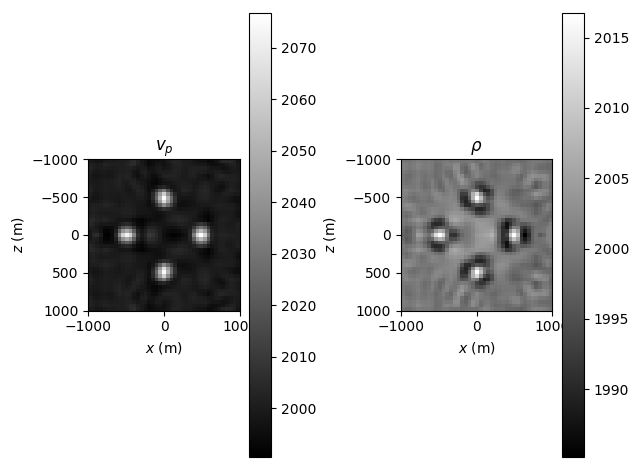

In [16]:
JuMIT.Plots.Seismic(rcls[2][5])

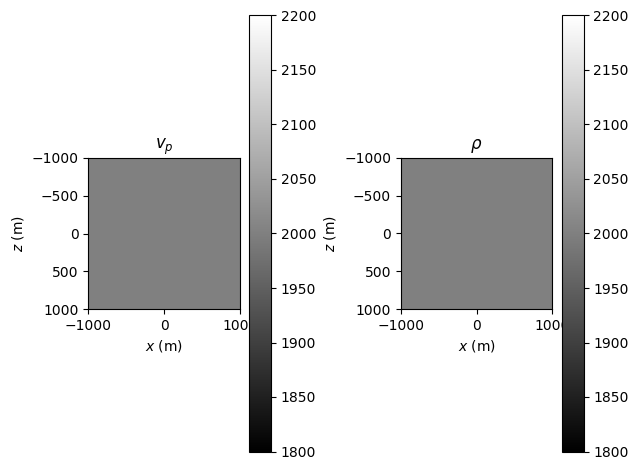

In [17]:
JuMIT.Plots.Seismic(pa.modi)

In [18]:
@time rcls = JuMIT.Inversion.xfwi!(pac)

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     7.631834e+02     5.742115e+02
 * Current step size: 1.0
 * g(x): [-10.7191,21.5393,23.6202,7.90744,4.40003,11.5995,15.163,20.0408,18.9284,-19.5486,-59.4004,-65.3994,-43.935,-37.7502,-65.5135,-62.5292,-26.5366,-25.0955,-81.1129,-137.033,-183.487,-137.5,-81.6159,-25.1577,-25.8578,-61.8503,-65.2824,-37.9031,-44.0555,-65.2988,-59.2392,-19.1586,20.2821,21.9222,16.7813,11.9521,2.87131,6.21771,23.2781,23.4014,-7.85943,-21.0629,-10.4105,-23.8786,-37.0266,-15.0905,19.7412,27.4355,26.7473,18.611,-21.146,-55.1549,-54.4751,-41.5667,-69.0069,-124.801,-116.393,-49.6496,-11.8056,-41.5651,-73.6134,-81.0108,-73.443,-41.6528,-12.0701,-49.639,-116.097,-124.74,-69.3894,-42.1511,-54.8489,-55.5701,-21.5324,18.9817,28.1853,29.245,20.6994,-16.3092,-39.4302,-25.5402,-9.67535,-18.2206,-45.4023,-41.0462,-37.0775,-21.1281,32.5926,58.2748,45.5245,25.6881,10.7376,-14.2815,-27.1923,-14.7334,-14.8245,-82.5418,-160.229,-149.565,-71.6774,-2.88074,17.153,38.8946,88.380

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     7.006687e+02     7.135948e+02
 * Current step size: 3.3472873840949207e-6
 * g(x): [-8.47967,28.0116,35.4043,27.7452,35.6594,36.7936,29.0633,17.8657,-0.353076,-40.3927,-77.9971,-81.9464,-61.1033,-47.0604,-69.2209,-66.936,-37.6393,-28.8567,-64.2082,-94.343,-117.534,-94.7466,-64.6378,-28.8836,-36.9593,-66.2237,-68.8818,-47.0307,-60.9725,-81.6808,-77.7794,-40.0733,0.793184,19.5571,30.5958,37.2523,34.5054,26.4578,35.3827,30.0493,-5.62811,-10.1757,8.8129,-0.69644,-9.28985,13.4954,26.3297,6.4009,-22.353,-58.3087,-84.3581,-106.432,-91.8016,-58.7241,-51.1624,-82.4262,-74.057,-24.9278,3.41851,-5.31957,-6.8323,15.6218,-6.73021,-5.44174,3.17854,-24.7568,-73.4836,-82.026,-51.2297,-59.0927,-92.1975,-107.066,-85.1404,-58.5922,-21.5686,7.61685,26.9349,12.3442,-11.3037,-1.88868,9.95789,-7.17299,-28.0438,-18.0776,-16.5698,-5.3805,31.6014,25.6361,-22.0372,-66.8272,-97.4467,-86.5235,-80.6946,-52.3312,-23.2448,-41.5978,-80.1879,-65.6837,-8.23852,32.1478,58.1918,92.8095,151.833,93.2548,58.2436,3

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     4.944531e+02     6.507675e+02
 * Current step size: 1.4659791235792638e-5
 * g(x): [7.48926,39.5547,38.4618,22.9599,1.96868,-31.6611,-61.1478,-52.9332,10.5763,72.0751,100.619,119.412,158.521,122.661,86.7562,68.9383,98.8927,103.532,103.431,88.6107,86.7659,88.202,103.053,103.678,99.9264,69.9153,87.2078,122.756,158.949,120.106,101.129,72.2538,10.824,-52.4112,-60.585,-31.3903,1.83894,22.9462,39.2199,41.5308,9.66135,23.0241,33.0559,2.23721,-30.8943,-59.1346,-64.9348,-56.5813,5.43858,131.883,174.699,168.657,146.752,138.229,54.667,-21.5356,-51.691,-35.6821,-16.7057,-46.2161,-124.939,-234.608,-124.99,-46.3357,-16.6706,-34.7508,-50.2033,-20.2188,55.4617,138.907,147.296,168.808,174.242,130.963,4.77294,-57.1206,-65.5099,-59.9232,-31.4204,2.48096,34.8284,25.59,5.90453,-6.80061,-37.6551,-59.3376,-65.2558,-40.3102,0.17274,84.2916,201.703,178.227,127.878,82.2973,39.8228,-57.9675,-153.473,-172.729,-164.527,-136.94,-176.915,-268.34,-428.902,-268.296,-177.053,-137.145,-163.861,-171.136,-151.9

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     4.079291e+02     6.507921e+02
 * Current step size: 1.0
 * g(x): [7.50539,39.5731,38.4779,22.9753,1.98328,-31.647,-61.1341,-52.9198,10.5895,72.088,100.632,119.425,158.534,122.674,86.7697,68.9521,98.9071,103.546,103.445,88.6247,86.7795,88.2159,103.068,103.693,99.9408,69.9291,87.2213,122.769,158.962,120.118,101.141,72.2667,10.8372,-52.3978,-60.5713,-31.3762,1.85354,22.9616,39.236,41.5492,9.6775,23.042,33.0765,2.25473,-30.8778,-59.1191,-64.9198,-56.5669,5.4525,131.897,174.712,168.67,146.766,138.243,54.6812,-21.5212,-51.6761,-35.6664,-16.6899,-46.2004,-124.923,-234.592,-124.974,-46.32,-16.6548,-34.7351,-50.1883,-20.2043,55.476,138.92,147.309,168.82,174.255,130.977,4.78687,-57.1062,-65.4949,-59.9077,-31.4039,2.49846,34.849,25.6079,5.92019,-6.78304,-37.6399,-59.3231,-65.2421,-40.297,0.185331,84.3036,201.714,178.238,127.889,82.3086,39.8349,-57.955,-153.46,-172.715,-164.513,-136.926,-176.901,-268.326,-428.887,-268.282,-177.039,-137.131,-163.8

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     3.362698e+02     5.743527e+02
 * Current step size: 2.6051252302862163e-6
 * g(x): [3.12624,34.1472,40.4806,42.8225,60.2935,38.835,-4.60484,-44.747,-62.7954,-40.5194,-26.1073,-6.83123,22.9101,31.0473,26.5239,30.0541,58.5897,73.6719,99.5209,130.927,172.864,130.324,98.9264,73.7457,59.7154,31.0459,26.7716,30.7319,22.7837,-6.50085,-25.7944,-40.3877,-62.5108,-44.2583,-4.25668,38.6762,59.4632,42.1548,40.6382,35.6124,5.06048,23.6273,39.0554,21.4885,12.0163,20.3994,-5.34696,-57.6964,-87.0665,-66.9142,-4.93772,26.3247,51.1775,97.6431,101.654,95.4139,81.6228,75.7183,62.6919,83.7499,103.704,120.476,103.772,83.6546,62.6357,76.3387,82.62,96.1419,101.928,98.0827,51.9981,27.1396,-4.45566,-66.5522,-86.6821,-57.4629,-5.59546,19.3608,10.8689,20.9318,39.9268,25.5919,13.8219,9.34044,-10.6381,-16.3214,-11.296,-39.4341,-89.961,-97.3695,-37.8002,37.0472,62.8797,78.1084,122.769,123.476,124.537,111.443,78.6439,31.938,36.8593,40.8766,17.075,41.3774,37.0109,31.5819,78.5099,112.133,125.477,124.154,123.

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     3.027103e+02     3.710681e+02
 * Current step size: 5.832263515278112e-6
 * g(x): [-3.07661,16.3164,15.1318,9.5117,19.5642,19.2286,3.81336,-9.33891,-9.55153,-7.44337,-14.2721,-17.6219,-17.5744,-20.9375,-28.7665,-17.6971,13.3855,27.7058,29.0,29.8611,35.7842,29.2479,28.3994,27.7395,14.3449,-16.9336,-28.7277,-21.3562,-17.6559,-17.1628,-13.7748,-7.03719,-8.79721,-8.36777,4.66226,19.5713,19.2289,9.00661,15.0919,17.2523,-1.62839,6.06941,8.56974,-9.09305,-16.7892,4.67368,17.7314,6.73079,3.00912,28.1035,42.0524,39.2472,31.4428,27.6285,3.68144,-17.6226,-18.855,-3.65777,8.46349,9.0361,-6.98579,-32.5813,-7.11198,8.70659,8.24401,-3.10086,-17.8242,-16.7949,4.09673,28.1917,32.2464,39.9499,42.4313,28.5277,3.67515,7.44871,18.1517,4.52895,-17.3429,-9.48754,9.06606,7.43839,-9.39321,-17.606,-27.2292,-20.1197,15.103,25.9452,10.3753,8.64785,43.8349,60.755,61.6154,60.0555,65.7966,31.5945,5.30035,-5.82873,-17.0331,-18.9913,-15.7139,-30.2246,-74.3521,-29.9881,-15.8732,-19.5103,-17.0706,-4.87267,6.5

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     3.026238e+02     3.710681e+02
 * Current step size: 1.0
 * g(x): [-3.07659,16.3164,15.1319,9.51172,19.5642,19.2286,3.81337,-9.3389,-9.55152,-7.44336,-14.2721,-17.6219,-17.5744,-20.9375,-28.7665,-17.6971,13.3855,27.7058,29.0,29.8612,35.7842,29.2479,28.3994,27.7395,14.3449,-16.9336,-28.7277,-21.3562,-17.6559,-17.1628,-13.7748,-7.03717,-8.79719,-8.36775,4.66227,19.5713,19.229,9.00663,15.0919,17.2524,-1.62837,6.06943,8.56977,-9.09303,-16.7892,4.67369,17.7314,6.73081,3.00913,28.1035,42.0524,39.2472,31.4428,27.6286,3.68145,-17.6226,-18.855,-3.65775,8.46351,9.03612,-6.98578,-32.5812,-7.11197,8.70661,8.24403,-3.10084,-17.8242,-16.7949,4.09675,28.1917,32.2464,39.9499,42.4313,28.5277,3.67516,7.44873,18.1517,4.52897,-17.3429,-9.48753,9.06608,7.43841,-9.3932,-17.606,-27.2291,-20.1197,15.103,25.9452,10.3753,8.64786,43.8349,60.755,61.6154,60.0555,65.7966,31.5945,5.30037,-5.82871,-17.0331,-18.9913,-15.7139,-30.2246,-74.3521,-29.9881,-15.8732,-19.510

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     2.804112e+02     4.311838e+02
 * Current step size: 1.975812366804086e-6
 * g(x): [-3.16,17.5386,18.9069,16.7804,31.7555,30.7027,13.5101,-4.01108,-11.5272,-15.5517,-25.8702,-30.9075,-33.0317,-32.2345,-38.0304,-27.1436,-0.617663,15.2674,21.0513,29.3313,40.6474,28.7505,20.4851,15.3053,0.303098,-26.403,-37.9595,-32.563,-32.9867,-30.3731,-25.3396,-15.1393,-10.7812,-3.05012,14.3663,31.103,31.5744,16.4475,19.021,18.5899,-1.66791,8.28853,14.1011,-0.424687,-4.93775,18.5935,24.3569,3.47307,-13.2181,-6.98681,3.89627,0.133155,-4.35246,-3.22389,-8.47383,-17.5732,-14.1722,-1.35068,10.0016,17.4689,12.8223,-0.198701,12.6488,17.0911,9.742,-0.823305,-13.1324,-16.7027,-8.01352,-2.69253,-3.70224,0.589703,3.99055,-6.89011,-12.8201,3.95272,24.621,18.4465,-5.34731,-0.61214,14.8241,9.79846,-4.8697,-9.69623,-17.6873,-10.4418,19.5925,16.6099,-15.2037,-32.188,-14.0261,12.3304,18.2231,22.6618,36.3075,25.4771,16.6134,13.0564,3.05108,-2.6567,4.67673,-3.71005,-40.0456,-3.60024,4.40164,-3.21728,3.05578,14

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     2.804111e+02     4.311838e+02
 * Current step size: 1.0
 * g(x): [-3.16,17.5386,18.9069,16.7804,31.7555,30.7027,13.5101,-4.01108,-11.5272,-15.5517,-25.8702,-30.9075,-33.0317,-32.2345,-38.0304,-27.1436,-0.617663,15.2674,21.0513,29.3313,40.6474,28.7505,20.4851,15.3053,0.303098,-26.403,-37.9595,-32.563,-32.9867,-30.3731,-25.3396,-15.1393,-10.7812,-3.05012,14.3663,31.103,31.5744,16.4475,19.021,18.5899,-1.66791,8.28853,14.1011,-0.424687,-4.93775,18.5935,24.3569,3.47307,-13.2181,-6.98681,3.89627,0.133155,-4.35246,-3.22389,-8.47383,-17.5732,-14.1722,-1.35068,10.0016,17.4689,12.8223,-0.198701,12.6488,17.0911,9.742,-0.823305,-13.1324,-16.7027,-8.01352,-2.69253,-3.70224,0.589703,3.99055,-6.89011,-12.8201,3.95272,24.621,18.4465,-5.34731,-0.61214,14.8241,9.79846,-4.8697,-9.69623,-17.6873,-10.4418,19.5925,16.6099,-15.2037,-32.188,-14.0261,12.3304,18.2231,22.6618,36.3075,25.4771,16.6134,13.0564,3.05108,-2.6567,4.67673,-3.71005,-40.0456,-3.60024,4.4

Excessive output truncated after 524294 bytes.

0.0173337,-16.4412,13.0213,50.1376,46.5761,-17.4074,-44.3737,54.2207,242.742,419.835,242.912,54.3767,-44.3799,-17.6311,46.3831,50.0999,13.1309,-16.2466,0.20792,14.7073,10.9782,13.1319,29.1002,38.8062,28.5655,6.71737,-10.0346,-15.7606,-20.2456,-10.6576,29.5513,20.8818,18.5271,21.4035,43.0261,61.1461,60.9748,34.103,11.9214,12.9593,18.0127,7.73086,5.50156,28.7011,44.2232,26.1806,-30.9268,-53.7332,9.32571,139.029,257.295,139.27,9.65462,-53.4838,-30.9104,26.0038,44.0414,28.6145,5.51592,7.82147,18.188,13.2013,12.2936,34.618,61.637,61.9552,44.5118,23.2028,20.7017,23.3264,31.3546,54.2244,38.0834,19.3717,11.0037,30.7415,58.5924,64.0371,39.7241,22.6182,25.9402,27.7879,16.0076,19.3193,30.3085,31.8041,26.11,6.82804,-41.5378,-70.4916,-53.9857,-36.4596,-53.792,-70.0928,-40.9714,7.44481,26.3489,31.7655,30.1626,19.1985,15.9517,27.7958,26.1024,23.1324,40.5432,65.2807,60.3589,33.7666,14.4312,23.0973,41.7331,56.5472,52.538,28.7233,-5.22855,-25.4343,-9.61308,35.767,53.7899,39.4242,26.7836,24.6802,20.0596,

(SIT.Models.Seismic[SIT.Models.Seismic([1700.0,2300.0],[1.0,1.0],[1700.0,2300.0],[-0.000244853 -0.00055699 … 0.000388364 -0.000879664; 0.00066424 0.000282589 … 0.000417529 -0.000593885; … ; 0.000812444 0.000401109 … 0.000297924 -0.000695562; -6.55891e-5 -0.000326159 … 0.000206876 -0.000976048],[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],[8.10554e-5 -6.24933e-5 … -0.000334183 -0.000407444; 0.000350198 0.000177796 … -0.000703194 -0.000800736; … ; 7.24628e-5 -5.88342e-5 … -0.000490928 -0.000617292; -0.000236029 -0.000491782 … -1.76806e-5 -0.000248083],SIT.Grid.M2D([-1000.0,-960.0,-920.0,-880.0,-840.0,-800.0,-760.0,-720.0,-680.0,-640.0  …  640.0,680.0,720.0,760.0,800.0,840.0,880.0,920.0,960.0,1000.0],[-1000.0,-960.0,-920.0,-880.0,-840.0,-800.0,-760.0,-720.0,-680.0,-640.0  …  640.0,680.0,720.0,760.0,800.0,840.0,880.0,920.0,960.0,1000.0],51,51,50,40.0,40.0)),SIT.Models.Seismic([1700.0,2300.0],[1.0,1.0],[1700.0,2300.0],[-0.000256302 -0.000576566 … 0.000308

In [19]:
@time rcls = JuMIT.Inversion.xfwi!(pac)

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     4.875464e+02     8.118389e+02
 * Current step size: 1.0
 * g(x): [0.410526,45.2575,54.6194,46.6429,45.438,23.3306,-4.83324,-21.8023,-16.1744,-5.01193,-4.59683,9.91861,52.5897,58.0854,41.9952,40.2054,83.5934,99.7842,106.452,109.099,130.09,108.442,105.847,99.9065,84.7154,41.0668,42.0767,57.6192,52.2177,9.95836,-4.49426,-4.86499,-15.6162,-21.0804,-4.42021,23.081,44.5729,46.222,55.1689,46.9912,2.27174,18.2928,48.4159,28.1545,1.38879,-10.3771,-24.0126,-51.5104,-56.9691,-27.5815,5.85349,14.8216,37.1198,96.5019,95.9892,68.2,50.6004,64.9823,59.5077,55.7716,46.6756,45.0861,46.6429,55.5552,59.3514,65.3663,51.1754,68.4116,95.7798,96.3645,37.3441,15.0568,5.97347,-27.2198,-56.3602,-51.1056,-24.3,-11.5802,0.363951,28.0606,49.8651,20.4642,7.93877,14.9999,-11.3828,-33.6951,-38.9163,-44.2987,-68.3873,-61.6264,-13.6699,21.9618,24.7294,39.6066,88.3609,78.3899,50.1731,38.1793,27.7781,-3.71991,-17.3249,-26.4396,-47.4204,-25.9845,-17.291,-4.25393,27.2957,3

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     3.645337e+02     4.638474e+02
 * Current step size: 2.0799668037399597e-5
 * g(x): [-19.5885,-12.2908,-14.7376,-22.609,-11.1286,17.3894,34.9565,44.17,41.0615,-6.19348,-59.7513,-105.14,-161.0,-161.703,-163.973,-131.854,-94.0222,-66.4783,-86.9112,-106.043,-129.356,-106.435,-87.215,-66.3026,-93.2335,-131.258,-163.747,-161.433,-159.957,-103.951,-58.9437,-5.72461,42.0788,45.916,37.1649,19.4366,-9.79081,-22.5331,-15.0164,-12.1128,-18.7264,-31.9521,-35.4413,-37.9331,-32.1111,16.1612,68.4044,89.5806,87.0948,73.931,18.6875,-30.0376,-73.3655,-133.79,-154.15,-166.746,-137.017,-88.3713,-36.0807,-30.6662,-37.7507,-44.511,-38.4102,-31.4672,-36.3762,-87.2116,-135.025,-164.873,-152.846,-132.85,-73.2315,-30.9202,16.8984,71.8389,86.3543,90.08,69.8524,18.016,-31.3348,-37.9043,-35.3493,-31.1979,-50.7798,-45.3015,-26.327,3.77375,74.1857,105.937,96.5455,63.3057,33.7372,7.87135,1.80073,4.01245,-6.04682,-41.7102,-66.8285,-69.0419,-49.6687,-1.46942,31.1563,45.949,54.4668,45.1409,30.0833,-1.99462,-48

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     2.793982e+02     2.952963e+02
 * Current step size: 1.0713239031093535e-5
 * g(x): [-11.2475,-19.8811,-29.238,-34.7402,-27.322,-8.35856,4.84787,27.7761,61.4408,48.7401,20.841,-10.4752,-49.1949,-73.6206,-88.8647,-78.5378,-71.7396,-74.951,-107.52,-139.622,-182.5,-140.742,-108.602,-74.9122,-70.3253,-77.7103,-89.3748,-74.9331,-50.1279,-10.3094,21.4006,49.4596,62.5989,28.7462,5.17039,-9.05131,-29.4416,-37.1947,-31.2625,-20.5278,-10.1909,-22.5114,-47.7852,-54.5755,-44.2221,-4.28032,39.419,71.1368,102.684,135.449,80.9511,16.7146,-55.0759,-158.304,-209.318,-236.029,-197.955,-140.943,-85.0736,-111.734,-180.085,-275.235,-180.34,-112.387,-85.5668,-141.008,-198.35,-237.255,-210.858,-158.853,-53.8427,18.8951,83.575,139.007,105.858,73.6423,40.6196,-5.0177,-46.5983,-57.5731,-50.1247,-22.6217,-48.2091,-64.9117,-44.567,-6.92813,56.5847,88.998,108.639,120.676,122.141,51.3155,-6.01439,-62.3527,-167.083,-242.438,-294.106,-261.485,-189.482,-88.5273,-85.4934,-144.85,-248.696,-144.137,-85.5243,-89

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     2.409740e+02     2.952906e+02
 * Current step size: 1.0
 * g(x): [-11.2403,-19.8728,-29.2308,-34.7333,-27.3155,-8.35226,4.85396,27.7821,61.4467,48.7458,20.8466,-10.4696,-49.1891,-73.6147,-88.8587,-78.5316,-71.7331,-74.9445,-107.514,-139.616,-182.494,-140.736,-108.596,-74.9056,-70.3188,-77.7041,-89.3688,-74.9271,-50.1221,-10.3038,21.4062,49.4653,62.6047,28.7522,5.17649,-9.04501,-29.4351,-37.1878,-31.2553,-20.5196,-10.1837,-22.5034,-47.776,-54.5677,-44.2147,-4.27341,39.4257,71.1432,102.69,135.455,80.9569,16.7204,-55.07,-158.298,-209.312,-236.023,-197.948,-140.936,-85.0665,-111.727,-180.078,-275.228,-180.333,-112.38,-85.5597,-141.001,-198.343,-237.248,-210.852,-158.847,-53.8369,18.9009,83.5808,139.013,105.864,73.6486,40.6262,-5.01078,-46.5909,-57.5653,-50.1155,-22.6137,-48.2021,-64.9039,-44.5602,-6.92172,56.5908,89.0039,108.645,120.681,122.146,51.3205,-6.00945,-62.3476,-167.078,-242.433,-294.1,-261.479,-189.475,-88.5211,-85.4871,-144.844

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     2.026590e+02     2.841413e+02
 * Current step size: 3.481010115092765e-6
 * g(x): [-5.81952,-5.64906,-8.47195,-2.09253,28.1344,38.9547,24.3747,0.322038,-24.4257,-37.2157,-48.207,-54.6261,-68.9156,-62.7044,-56.6868,-38.6341,-29.4278,-31.1703,-32.4339,-18.1304,-7.49177,-18.5194,-32.7736,-31.0319,-28.6961,-38.2145,-56.7953,-62.8383,-68.2051,-53.482,-47.2385,-36.4671,-23.2216,1.78279,25.8224,40.0317,28.6301,-2.25067,-8.56525,-4.9097,-4.36435,-0.232229,-14.302,-21.6104,-6.87825,38.5781,47.836,21.5253,-9.93204,-26.8733,-22.8197,-27.4037,-40.2748,-65.8394,-61.3416,-44.3918,-13.7806,10.4906,17.1244,29.3755,40.5114,47.0628,40.1777,28.7657,16.6035,10.67,-13.0676,-43.7932,-61.049,-65.5548,-40.1889,-27.8941,-23.8195,-27.8161,-10.0513,21.8907,48.4597,39.2513,-6.74661,-21.6755,-13.694,1.29194,-16.2081,-32.3419,-24.7801,4.859,52.8874,42.489,0.503304,-30.4019,-26.2872,2.219,10.5188,1.83429,-20.4725,-29.2842,-13.9615,11.4198,31.652,42.7953,68.8901,80.9303,75.1416,80.5694,68.1086,41.9473,31.5

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     2     1.702123e+02     2.107649e+02
 * Current step size: 9.460519019517525e-6
 * g(x): [3.8693,22.2359,22.8558,23.7594,38.5666,30.3267,8.66303,-10.8391,-15.9248,-4.91517,4.72367,13.8273,21.2951,12.5822,6.31592,8.58505,16.7729,18.4818,33.0872,57.3928,82.6967,56.9935,32.7531,18.7195,17.7532,9.10532,5.89933,11.5725,20.4388,13.6271,4.68809,-4.84823,-15.5748,-10.6783,8.14744,29.1344,37.1028,23.196,23.3259,23.8826,5.6734,33.1432,37.7364,16.2764,6.59252,16.7296,8.95475,-16.6832,-32.848,-23.1808,5.13494,18.875,24.5491,33.257,30.9526,33.5408,35.9857,32.1114,21.2213,32.7181,41.0141,38.8588,41.3016,32.8231,21.0832,31.9816,35.8771,33.1452,30.3734,33.1295,25.1647,19.7493,6.06727,-21.858,-31.7908,-16.4055,8.15545,15.02,5.38719,16.0855,39.1062,35.273,29.7574,13.8747,-10.9752,-17.5503,-7.28099,-14.1588,-40.9812,-49.3587,-25.6696,8.0003,14.9025,12.5862,18.0621,23.9547,37.4927,46.427,31.6101,7.41728,12.5957,8.98121,-23.0753,9.69266,12.9806,6.98735,30.5968,45.8935,37.4397,24.1735,18.8382,13.8649,16

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     1.701738e+02     2.107649e+02
 * Current step size: 1.0
 * g(x): [3.8693,22.236,22.8558,23.7594,38.5666,30.3267,8.66304,-10.8391,-15.9247,-4.91516,4.72368,13.8273,21.2951,12.5822,6.31593,8.58506,16.7729,18.4818,33.0872,57.3928,82.6967,56.9935,32.7532,18.7195,17.7532,9.10532,5.89934,11.5725,20.4388,13.6271,4.68809,-4.84823,-15.5748,-10.6783,8.14744,29.1344,37.1028,23.196,23.3259,23.8826,5.67341,33.1432,37.7365,16.2764,6.59253,16.7297,8.95475,-16.6831,-32.848,-23.1808,5.13494,18.875,24.5491,33.257,30.9526,33.5408,35.9857,32.1114,21.2213,32.7182,41.0142,38.8589,41.3016,32.8231,21.0832,31.9816,35.8771,33.1452,30.3734,33.1295,25.1647,19.7493,6.06727,-21.858,-31.7908,-16.4054,8.15546,15.02,5.38719,16.0855,39.1062,35.273,29.7574,13.8747,-10.9752,-17.5503,-7.28098,-14.1588,-40.9812,-49.3586,-25.6696,8.00031,14.9025,12.5862,18.0621,23.9547,37.4927,46.427,31.6101,7.41729,12.5957,8.98122,-23.0753,9.69266,12.9806,6.98736,30.5968,45.8935,37.4397,2

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


     1     1.613482e+02     1.586759e+02
 * Current step size: 3.52722569050989e-6
 * g(x): [-2.09396,11.1081,10.7868,9.5885,18.4339,13.5705,-0.700486,-8.73546,-1.87578,8.43131,12.8773,15.2595,15.9671,4.62258,-1.95907,2.70614,13.4504,13.3914,19.0404,31.2696,44.1916,30.9672,18.8094,13.6315,14.2939,3.14797,-2.26607,3.94205,15.6516,15.4874,13.1529,8.71382,-1.27274,-8.21806,-0.639314,13.1754,17.9734,9.64309,11.4599,12.5469,-0.642391,19.0399,18.8017,1.11965,-6.28748,5.69551,9.73519,1.21019,2.53634,27.572,41.5534,40.8985,29.9437,16.5204,-1.54653,-7.69274,-1.23822,5.43156,4.9674,6.93724,-2.58307,-25.1592,-2.47881,6.88741,4.80009,5.5286,-0.894833,-7.50424,-1.56786,16.7351,30.4118,41.2461,41.7075,27.9169,2.96126,1.27887,9.28683,5.00472,-6.50281,1.59895,20.3508,20.9245,12.5267,-2.36602,-18.0494,-17.063,3.98246,11.2712,3.28454,8.07216,38.2636,47.6982,40.7164,25.3717,8.69264,-10.9936,-16.5841,-8.98184,-12.3658,-16.2846,-14.7555,-31.4381,-79.2415,-31.1357,-14.7071,-16.6861,-12.7417,-8.68098,-16.001

decrease spatial sampling below:	36.041407867494826
decrease spatial sampling below:	36.041407867494826


Iter     Function value   Gradient norm 
     0     1.613481e+02     1.586759e+02
 * Current step size: 1.0
 * g(x): [-2.09396,11.1081,10.7868,9.5885,18.4339,13.5705,-0.700486,-8.73546,-1.87578,8.43131,12.8773,15.2595,15.9671,4.62258,-1.95907,2.70614,13.4504,13.3914,19.0404,31.2696,44.1916,30.9672,18.8094,13.6315,14.2939,3.14797,-2.26607,3.94205,15.6516,15.4874,13.1529,8.71382,-1.27274,-8.21806,-0.639314,13.1754,17.9734,9.64309,11.4599,12.5469,-0.642391,19.0399,18.8017,1.11965,-6.28748,5.69551,9.73519,1.21019,2.53634,27.572,41.5534,40.8985,29.9437,16.5204,-1.54653,-7.69274,-1.23822,5.43156,4.9674,6.93724,-2.58307,-25.1592,-2.47881,6.88741,4.80009,5.5286,-0.894833,-7.50424,-1.56786,16.7351,30.4118,41.2461,41.7075,27.9169,2.96126,1.27887,9.28683,5.00472,-6.50281,1.59895,20.3508,20.9245,12.5267,-2.36602,-18.0494,-17.063,3.98246,11.2712,3.28454,8.07216,38.2636,47.6982,40.7164,25.3717,8.69264,-10.9936,-16.5841,-8.98184,-12.3658,-16.2846,-14.7555,-31.4381,-79.2415,-31.1357,-14.7071,-16.6861,

Excessive output truncated after 524288 bytes.

5333,-88.1983,-92.4633,-87.9938,-79.2602,-33.9738,6.84335,-14.1158,-60.4558,-87.3194,-89.1566,-57.5108,-59.8934,-68.4337,-75.4334,-50.3498,-38.5992,-34.9579,-49.4896,-44.2281,-20.9246,19.0122,40.821,17.6994,11.2406,-8.83949,-27.1646,-41.9192,-38.3578,-39.3194,-41.4655,-52.8484,-45.7814,-46.4104,-58.0591,-87.1432,-62.9693,-27.21,-3.35087,-30.4387,-71.5704,-64.4347,2.65576,61.9528,2.73439,-64.3907,-71.6094,-30.4777,-3.21885,-26.9181,-62.6767,-87.0273,-58.0649,-46.2655,-45.4203,-52.2934,-40.8879,-38.6126,-37.7348,-41.5747,-26.9693,-8.43085,11.7967,17.8482,27.4007,21.9101,8.09676,-6.12977,-24.3911,-31.0158,-32.3366,-35.7034,-47.4681,-42.2427,-46.8428,-60.1479,-77.6097,-44.7592,-18.5624,-17.2935,-64.0613,-86.4663,-45.215,58.1975,148.077,58.2652,-45.2012,-86.6003,-64.357,-17.446,-18.4774,-44.5403,-77.4901,-60.1675,-46.743,-41.9322,-46.9141,-34.9535,-31.1224,-29.5411,-22.7925,-4.78275,9.63563,23.5935,28.4245,55.231,56.3371,47.1091,37.8643,19.2547,-5.76236,-16.8922,-28.8182,-44.4502,-41.5291,-

(SIT.Models.Seismic[SIT.Models.Seismic([1700.0,2300.0],[1.0,1.0],[1700.0,2300.0],[-0.000333356 -0.000678428 … -0.000367529 -0.00190612; 0.000733029 0.000196448 … 9.69795e-5 -0.00124519; … ; 0.000936658 0.000381766 … -4.15132e-5 -0.00133394; -7.40254e-5 -0.000347413 … -0.000565786 -0.0020145],[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],[6.35445e-5 -0.00011129 … -0.000619806 -0.000692244; 0.000378559 0.000114091 … -0.00105321 -0.00113069; … ; 3.98619e-5 -0.000217128 … -0.00086652 -0.00101057; -0.000346354 -0.000672823 … -0.000342049 -0.000550801],SIT.Grid.M2D([-1000.0,-960.0,-920.0,-880.0,-840.0,-800.0,-760.0,-720.0,-680.0,-640.0  …  640.0,680.0,720.0,760.0,800.0,840.0,880.0,920.0,960.0,1000.0],[-1000.0,-960.0,-920.0,-880.0,-840.0,-800.0,-760.0,-720.0,-680.0,-640.0  …  640.0,680.0,720.0,760.0,800.0,840.0,880.0,920.0,960.0,1000.0],51,51,50,40.0,40.0)),SIT.Models.Seismic([1700.0,2300.0],[1.0,1.0],[1700.0,2300.0],[-0.000349551 -0.000570291 … -0.000989556

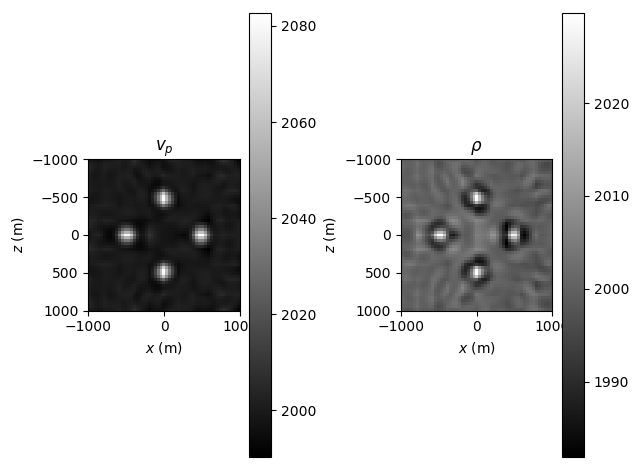

In [20]:
JuMIT.Plots.Seismic(pa.modm)